In [2]:
import spacy
import pandas as pd
from spacytextblob.spacytextblob import SpacyTextBlob

## Sentiment Analysis
5/11/2022
Running down several blog articles in order to judge their sentiment

Schema for test is: title, content, polarity, subjectivity

In [3]:
nlp = spacy.load("en_core_web_sm")
nlp.add_pipe("spacytextblob")

In [25]:
data_frame = pd.read_csv('./data/dataset.csv')

In [58]:
data_frame.describe()

,word_count,polarity,subjectivity
count,22.000000,22.000000,22.000000
mean,2387.227273,0.075501,0.458591
std,1231.944724,0.066012,0.053688
min,1034.000000,-0.106045,0.362908
25%,1704.500000,0.054266,0.429687
50%,2013.500000,0.090132,0.458119
75%,2590.750000,0.120110,0.486465
max,5943.000000,0.153225,0.551905


In [26]:
def sentiment_analysis(value):
    """Runs the NLP model over each row's content field to interpet the article sentiment.

    Input - pd.DataFrame.row

    Output
          - article polarity: Float
          - article subjectivity: Float  
    """
    if value['content']:
        text_data = value['content']
        doc = nlp(text_data)
        return pd.Series([doc._.blob.polarity, doc._.blob.subjectivity])
    else:
        return "N/A", "N/A"

In [27]:
data_frame[['polarity','subjectivity']] = data_frame.apply(lambda row,: sentiment_analysis(row), axis=1)

In [28]:
data_frame.head(20)

,title,content,word_count,polarity,subjectivity
0,Graph Data Visualization With GraphQL & react-...,"William Lyon / September 29, 202110 min read •...",1764,-0.106045,0.546654
1,LOCF and Linear Imputation with PostgreSQL,This tutorial will introduce vario...,1698,0.067014,0.400341
2,Recommending Subreddits by Computing User Simi...,Someone famous once said that if you click on...,2201,0.074672,0.493033
3,writing,Hiring data scientists Back to writing 202...,2284,0.139745,0.474933
4,No Cost Data Scraping With GitHub Actions And ...,"William Lyon / July 20, 202111 min read • When...",1846,0.153225,0.362908
5,Adaptive data analysis,"I just returned from NIPS 2015, a joyful week...",1724,0.088070,0.488368
6,Master Python`s pandas library with these 100 ...,"September 5, 2019 · Python tutorial Below you...",4031,0.112285,0.408070
7,Simulating Chutes & Ladders in Python,Mon 18 December 2017 Edit 12/19/2017: add...,5035,0.015709,0.431921
8,Slow Data,Abstract: Data is the new media. Thus the pos...,2864,0.092194,0.458740
9,Mimicking Writing Style With Markov Chains,"I’m not sure if you guys will remember this, ...",2005,0.051639,0.540245


### FineGrain look at the content

In [ ]:
data_frame.iloc[12]

In [ ]:
data_frame['content'].iloc[12]

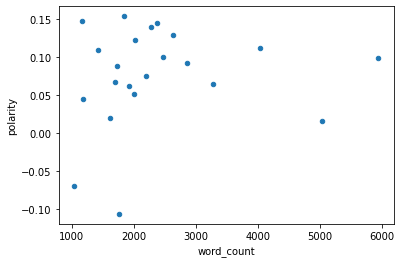

In [39]:
# examine the relationship between polarity and word_count, if any
chart = data_frame.plot(kind='scatter',x='word_count',y='polarity')

In [55]:
# getting more information on the range found
maxdf = data_frame[data_frame['polarity']==data_frame['polarity'].max()]
mindf = data_frame[data_frame['polarity']==data_frame['polarity'].min()]
print("The range of polarity for the given articles is: " + str(maxdf.iloc[0]['polarity'] + mindf.iloc[0]['polarity']))

The range of polarity for the given articles is: 0.04717963040543682


In [56]:
set_of_articles = data_frame['title'].unique()
print(sorted(set_of_articles))

['Adaptive data analysis', 'Analyzing Housing Prices in Berkeley', 'Approaching fairness in machine learning', 'Gradient descent learns linear dynamical systems', 'Graph Data Visualization With GraphQL & react-force-graph', 'Illustrated Guide to ROC and AUC', 'LOCF and Linear Imputation with PostgreSQL', 'Master Python`s pandas library with these 100 tricks', 'Mimicking Writing Style With Markov Chains', 'No Cost Data Scraping With GitHub Actions And Neo4j Aura', 'Optimization of Scientific Code with Cython: Ising Model', 'Recommending Subreddits by Computing User Similarity: An Introduction to Machine Learning in Python', 'Reduce GPU costs with startup scripts on the Google Cloud Engine', 'Simulating Chutes & Ladders in Python', 'Slow Data', 'TODOs for Effective ML teamwork at an early-stage startup', 'The Softmax Function Derivative (Part\xa03)', 'The Waiting Time Paradox, or, Why Is My Bus Always Late?', 'Thoughts on Trace Estimation in Deep Learning - Sebastian Nowozins slow blog',